In [ ]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 MB 10.8 MB/s eta 0:00:0000:0100:01
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 31.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 28.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 31.5 MB/s eta 0:00:00

In [ ]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [26]:
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tabulate import tabulate
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, matthews_corrcoef, accuracy_score, precision_score, recall_score, f1_score, brier_score_loss, roc_curve, auc, roc_auc_score

In [3]:
data = pd.read_csv(heartstroke.csv)

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [7]:
data.drop_duplicates(inplace=True)

# Fill missing values using forward fill method
data.fillna(method='ffill', inplace=True)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = enc.fit_transform(data[col])

<ipython-input-7-4b8bb2e32acf>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [8]:
# Split features and target variable
X = data.drop(['stroke', 'id'], axis=1)
y = data['stroke']

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = Normalizer().fit_transform(X)

In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)


In [10]:
knn = KNeighborsClassifier(weights='distance')

In [11]:
def create_model():
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(X.shape[1], 1)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [12]:
# Initialize lists to store metrics for each fold
accuracy_scores_rf = []
precision_scores_rf = []
recall_scores_rf = []
f1_scores_rf = []
mcc_scores_rf = []
tp_list_rf = []
tn_list_rf = []
fp_list_rf = []
fn_list_rf = []
metrics_rf = []

accuracy_scores_knn = []
precision_scores_knn = []
recall_scores_knn = []
f1_scores_knn = []
mcc_scores_knn = []
tp_list_knn = []
tn_list_knn = []
fp_list_knn = []
fn_list_knn = []

accuracy_scores_lstm = []
precision_scores_lstm = []
recall_scores_lstm = []
f1_scores_lstm = []
mcc_scores_lstm = []
tp_list_lstm = []
tn_list_lstm = []
fp_list_lstm = []
fn_list_lstm = []

In [13]:
# Perform 10-fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    print(f"\nFold {fold}:")  # Print fold number

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the RandomForestClassifier
    rf.fit(X_train, y_train)

    # Predict on the test set for Random Forest
    y_pred_rf = rf.predict(X_test)
    y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

    conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
    mcc_rf = matthews_corrcoef(y_test, y_pred_rf)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    precision_rf = precision_score(y_test, y_pred_rf)
    recall_rf = recall_score(y_test, y_pred_rf)
    f1_rf = f1_score(y_test, y_pred_rf)
    tn_rf, fp_rf, fn_rf, tp_rf = conf_matrix_rf.ravel()
    tpr_rf = np.where(tp_rf + fn_rf == 0, 0, tp_rf / (tp_rf + fn_rf))
    fpr_rf = np.where(fp_rf + tn_rf == 0, 0, fp_rf / (fp_rf + tn_rf))
    tnr_rf = np.where(fp_rf + tn_rf == 0, 0, tn_rf / (fp_rf + tn_rf))
    fnr_rf = np.where(tp_rf + fn_rf == 0, 0, fn_rf / (tp_rf + fn_rf))
    bacc_rf = (tpr_rf + tnr_rf) / 2
    tss_rf = tpr_rf - fpr_rf
    hss_rf = np.where((tp_rf + fn_rf) * (fn_rf + tn_rf) + (tp_rf + fp_rf) * (fp_rf + tn_rf) == 0, 0, (2 * (tp_rf * tn_rf - fp_rf * fn_rf)) / ((tp_rf + fn_rf) * (fn_rf + tn_rf) + (tp_rf + fp_rf) * (fp_rf + tn_rf)))
    bs_rf = np.where((tp_rf + tn_rf + fp_rf + fn_rf) == 0, 0, ((fp_rf + fn_rf) / (tp_rf + tn_rf + fp_rf + fn_rf)))
    bss_rf = (bs_rf - accuracy_rf) / (1 - accuracy_rf)

    # Append metrics to lists
    metrics_rf.append([fold, mcc_rf, accuracy_rf, precision_rf, recall_rf, f1_rf,
                       tp_rf, tn_rf, fp_rf, fn_rf, tpr_rf, tnr_rf, fpr_rf, fnr_rf, bacc_rf, tss_rf, hss_rf, bs_rf, bss_rf])


    # Append metrics to lists for Random Forest
    accuracy_scores_rf.append(accuracy_rf)
    precision_scores_rf.append(precision_rf)
    recall_scores_rf.append(recall_rf)
    f1_scores_rf.append(f1_rf)
    mcc_scores_rf.append(mcc_rf)
    tp_list_rf.append(tp_rf)
    tn_list_rf.append(tn_rf)
    fp_list_rf.append(fp_rf)
    fn_list_rf.append(fn_rf)

    # Train the KNN classifier
    knn.fit(X_train, y_train)

    # Predict on the test set for KNN
    y_pred_knn = knn.predict(X_test)

    # Calculate performance metrics for KNN
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    precision_knn = precision_score(y_test, y_pred_knn)
    recall_knn = recall_score(y_test, y_pred_knn)
    f1_knn = f1_score(y_test, y_pred_knn)
    mcc_knn = matthews_corrcoef(y_test, y_pred_knn)
    tn_knn, fp_knn, fn_knn, tp_knn = confusion_matrix(y_test, y_pred_knn).ravel()

    # Append metrics to lists for KNN
    accuracy_scores_knn.append(accuracy_knn)
    precision_scores_knn.append(precision_knn)
    recall_scores_knn.append(recall_knn)
    f1_scores_knn.append(f1_knn)
    mcc_scores_knn.append(mcc_knn)
    tp_list_knn.append(tp_knn)
    tn_list_knn.append(tn_knn)
    fp_list_knn.append(fp_knn)
    fn_list_knn.append(fn_knn)

    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Reshape input data for LSTM
    X_resampled = X_resampled.reshape((X_resampled.shape[0], X_resampled.shape[1], 1))
    X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Create and train the LSTM model
    model = create_model()
    model.fit(X_resampled, y_resampled, epochs=50, batch_size=64, verbose=0)

    # Evaluate the LSTM model
    y_pred_proba_lstm = model.predict(X_test_lstm)
    y_pred_lstm = (y_pred_proba_lstm > 0.5).astype(int)

    # Calculate performance metrics for LSTM
    accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
    precision_lstm = precision_score(y_test, y_pred_lstm)
    recall_lstm = recall_score(y_test, y_pred_lstm)
    f1_lstm = f1_score(y_test, y_pred_lstm)
    mcc_lstm = matthews_corrcoef(y_test, y_pred_lstm)
    tn_lstm, fp_lstm, fn_lstm, tp_lstm = confusion_matrix(y_test, y_pred_lstm).ravel()

    # Append metrics to lists for LSTM
    accuracy_scores_lstm.append(accuracy_lstm)
    precision_scores_lstm.append(precision_lstm)
    recall_scores_lstm.append(recall_lstm)
    f1_scores_lstm.append(f1_lstm)
    mcc_scores_lstm.append(mcc_lstm)
    tp_list_lstm.append(tp_lstm)
    tn_list_lstm.append(tn_lstm)
    fp_list_lstm.append(fp_lstm)
    fn_list_lstm.append(fn_lstm)

    # Print KNN predicted probabilities
    y_pred_proba_knn = knn.predict_proba(X_test)




Fold 1:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step

Fold 2:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step

Fold 3:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step

Fold 4:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

Fold 5:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step

Fold 6:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step

Fold 7:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step

Fold 8:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step

Fold 9:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step

Fold 10:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [14]:
# Print Random Forest metrics per fold
print("\nRandom Forest Metrics per Fold:")
for fold in range(1, 11):
    print(f"\nFold {fold}:")
    print("----------------------------------------")
    print(f"MCC: {mcc_scores_rf[fold-1]:.4f}")
    print(f"Accuracy: {accuracy_scores_rf[fold-1]:.4f}")
    print(f"Precision: {precision_scores_rf[fold-1]:.4f}")
    print(f"Recall: {recall_scores_rf[fold-1]:.4f}")
    print(f"F1 Score: {f1_scores_rf[fold-1]:.4f}")
    print(f"True Positive (TP): {tp_list_rf[fold-1]:.4f}")
    print(f"True Negative (TN): {tn_list_rf[fold-1]:.4f}")
    print(f"False Positive (FP): {fp_list_rf[fold-1]:.4f}")
    print(f"False Negative (FN): {fn_list_rf[fold-1]:.4f}")
    print(f"TPR (True Positive Rate): {tp_list_rf[fold-1] / (tp_list_rf[fold-1] + fn_list_rf[fold-1]):.4f}")
    print(f"TNR (True Negative Rate): {tn_list_rf[fold-1] / (tn_list_rf[fold-1] + fp_list_rf[fold-1]):.4f}")
    print(f"FPR (False Positive Rate): {fp_list_rf[fold-1] / (fp_list_rf[fold-1] + tn_list_rf[fold-1]):.4f}")
    print(f"FNR (False Negative Rate): {fn_list_rf[fold-1] / (fn_list_rf[fold-1] + tp_list_rf[fold-1]):.4f}")
    print(f"Balanced Accuracy (BACC): {(tp_list_rf[fold-1] + tn_list_rf[fold-1]) / len(y):.4f}")
    print(f"True Skill Score (TSS): {(tp_list_rf[fold-1] / (tp_list_rf[fold-1] + fn_list_rf[fold-1])) + (tn_list_rf[fold-1] / (tn_list_rf[fold-1] + fp_list_rf[fold-1])) - 1:.4f}")
    print(f"Heidke Skill Score (HSS): {(2 * (tp_list_rf[fold-1] * tn_list_rf[fold-1] - fp_list_rf[fold-1] * fn_list_rf[fold-1])) / ((tp_list_rf[fold-1] + fn_list_rf[fold-1]) * (fn_list_rf[fold-1] + tn_list_rf[fold-1]) + (tp_list_rf[fold-1] + fp_list_rf[fold-1]) * (fp_list_rf[fold-1] + tn_list_rf[fold-1])):.4f}")
    print(f"Brier Score (BS): {brier_score_loss([1 if i == 1 else 0 for i in y_test], y_pred_proba_rf):.4f}")
    print(f"Brier Skill Score (BSS): {(brier_score_loss([1 if i == 1 else 0 for i in y_test], y_pred_proba_rf) - accuracy_scores_rf[fold-1]) / (1 - accuracy_scores_rf[fold-1]):.4f}")
    print("----------------------------------------")



Random Forest Metrics per Fold:

Fold 1:
----------------------------------------
MCC: -0.0174
Accuracy: 0.9452
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
True Positive (TP): 0.0000
True Negative (TN): 483.0000
False Positive (FP): 3.0000
False Negative (FN): 25.0000
TPR (True Positive Rate): 0.0000
TNR (True Negative Rate): 0.9938
FPR (False Positive Rate): 0.0062
FNR (False Negative Rate): 1.0000
Balanced Accuracy (BACC): 0.0945
True Skill Score (TSS): -0.0062
Heidke Skill Score (HSS): -0.0106
Brier Score (BS): 0.0493
Brier Skill Score (BSS): -16.3505
----------------------------------------

Fold 2:
----------------------------------------
MCC: 0.1311
Accuracy: 0.9511
Precision: 0.5000
Recall: 0.0400
F1 Score: 0.0741
True Positive (TP): 1.0000
True Negative (TN): 485.0000
False Positive (FP): 1.0000
False Negative (FN): 24.0000
TPR (True Positive Rate): 0.0400
TNR (True Negative Rate): 0.9979
FPR (False Positive Rate): 0.0021
FNR (False Negative Rate): 0.9600
Balanced Accura

In [15]:
# Print metrics for Random Forest
headers_rf = ["Fold", "MCC", "Accuracy", "Precision", "Recall", "F1 Score", "TruePositive(TP)", "TrueNegative(TN)", "FalsePositive(FP)", "FalseNegative(FN)", "TPR", "TNR", "FPR", "FNR", "Balanced Accuracy(BACC)", "True Skill Score (TSS)", "Heidke Skill Score (HSS)", "Brier Score (BS)", "Brier Skill Score (BSS)"]
print("\nRandom Forest Metrics:")
for row in metrics_rf:
    for i in range(len(headers_rf)):
        print(f"{headers_rf[i]}: {row[i]}")
    print()


Random Forest Metrics:
Fold: 1
MCC: -0.017429327920504403
Accuracy: 0.9452054794520548
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
TruePositive(TP): 0
TrueNegative(TN): 483
FalsePositive(FP): 3
FalseNegative(FN): 25
TPR: 0.0
TNR: 0.9938271604938271
FPR: 0.006172839506172839
FNR: 1.0
Balanced Accuracy(BACC): 0.49691358024691357
True Skill Score (TSS): -0.006172839506172839
Heidke Skill Score (HSS): -0.010594716767905072
Brier Score (BS): 0.0547945205479452
Brier Skill Score (BSS): -16.25

Fold: 2
MCC: 0.13108074390845295
Accuracy: 0.9510763209393346
Precision: 0.5
Recall: 0.04
F1 Score: 0.07407407407407407
TruePositive(TP): 1
TrueNegative(TN): 485
FalsePositive(FP): 1
FalseNegative(FN): 24
TPR: 0.04
TNR: 0.9979423868312757
FPR: 0.00205761316872428
FNR: 0.96
Balanced Accuracy(BACC): 0.5189711934156378
True Skill Score (TSS): 0.03794238683127572
Heidke Skill Score (HSS): 0.0673140103672337
Brier Score (BS): 0.04892367906066536
Brier Skill Score (BSS): -18.439999999999976

Fold: 3
MCC: 0.0
A

In [16]:
# Print knn metrics per fold
print("\nKNN Metrics per Fold:")
for fold in range(1, 11):
    print(f"\nFold {fold}:")
    print("----------------------------------------")
    print(f"MCC: {mcc_scores_knn[fold-1]:.4f}")
    print(f"Accuracy: {accuracy_scores_knn[fold-1]:.4f}")
    print(f"Precision: {precision_scores_knn[fold-1]:.4f}")
    print(f"Recall: {recall_scores_knn[fold-1]:.4f}")
    print(f"F1 Score: {f1_scores_knn[fold-1]:.4f}")
    print(f"True Positive (TP): {tp_list_knn[fold-1]:.4f}")
    print(f"True Negative (TN): {tn_list_knn[fold-1]:.4f}")
    print(f"False Positive (FP): {fp_list_knn[fold-1]:.4f}")
    print(f"False Negative (FN): {fn_list_knn[fold-1]:.4f}")
    print(f"TPR (True Positive Rate): {tp_list_knn[fold-1] / (tp_list_knn[fold-1] + fn_list_knn[fold-1]):.4f}")
    print(f"TNR (True Negative Rate): {tn_list_knn[fold-1] / (tn_list_knn[fold-1] + fp_list_knn[fold-1]):.4f}")
    print(f"FPR (False Positive Rate): {fp_list_knn[fold-1] / (fp_list_knn[fold-1] + tn_list_knn[fold-1]):.4f}")
    print(f"FNR (False Negative Rate): {fn_list_knn[fold-1] / (fn_list_knn[fold-1] + tp_list_knn[fold-1]):.4f}")
    print(f"Balanced Accuracy (BACC): {(tp_list_knn[fold-1] + tn_list_knn[fold-1]) / len(y):.4f}")
    print(f"True Skill Score (TSS): {(tp_list_knn[fold-1] / (tp_list_knn[fold-1] + fn_list_knn[fold-1])) + (tn_list_knn[fold-1] / (tn_list_knn[fold-1] + fp_list_knn[fold-1])) - 1:.4f}")
    print(f"Heidke Skill Score (HSS): {(2 * (tp_list_knn[fold-1] * tn_list_knn[fold-1] - fp_list_knn[fold-1] * fn_list_knn[fold-1])) / ((tp_list_knn[fold-1] + fn_list_knn[fold-1]) * (fn_list_knn[fold-1] + tn_list_knn[fold-1]) + (tp_list_knn[fold-1] + fp_list_knn[fold-1]) * (fp_list_knn[fold-1] + tn_list_knn[fold-1])):.4f}")

    # Calculate Brier Score for positive class
    y_proba_pos_class = y_pred_proba_knn[:, 1]  # Assuming y_pred_proba_knn is a 2D array with probabilities for both classes
    brier_score = brier_score_loss([1 if i == 1 else 0 for i in y_test], y_proba_pos_class)
    print(f"Brier Score (BS): {brier_score:.4f}")

    # Calculate Brier Skill Score
    brier_skill_score = (brier_score - accuracy_scores_knn[fold-1]) / (1 - accuracy_scores_knn[fold-1])
    print(f"Brier Skill Score (BSS): {brier_skill_score:.4f}")

    print("----------------------------------------")


KNN Metrics per Fold:

Fold 1:
----------------------------------------
MCC: 0.1294
Accuracy: 0.9452
Precision: 0.2857
Recall: 0.0800
F1 Score: 0.1250
True Positive (TP): 2.0000
True Negative (TN): 481.0000
False Positive (FP): 5.0000
False Negative (FN): 23.0000
TPR (True Positive Rate): 0.0800
TNR (True Negative Rate): 0.9897
FPR (False Positive Rate): 0.0103
FNR (False Negative Rate): 0.9200
Balanced Accuracy (BACC): 0.0945
True Skill Score (TSS): 0.0697
Heidke Skill Score (HSS): 0.1059
Brier Score (BS): 0.0513
Brier Skill Score (BSS): -16.3146
----------------------------------------

Fold 2:
----------------------------------------
MCC: -0.0100
Accuracy: 0.9491
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
True Positive (TP): 0.0000
True Negative (TN): 485.0000
False Positive (FP): 1.0000
False Negative (FN): 25.0000
TPR (True Positive Rate): 0.0000
TNR (True Negative Rate): 0.9979
FPR (False Positive Rate): 0.0021
FNR (False Negative Rate): 1.0000
Balanced Accuracy (BACC): 0

In [17]:
# Print LSTM metrics per fold
print("\nLSTM Metrics per Fold:")
for fold in range(1, 11):
    print(f"\nFold {fold}:")
    print("----------------------------------------")
    print(f"MCC: {mcc_scores_lstm[fold-1]:.4f}")
    print(f"Accuracy: {accuracy_scores_lstm[fold-1]:.4f}")
    print(f"Precision: {precision_scores_lstm[fold-1]:.4f}")
    print(f"Recall: {recall_scores_lstm[fold-1]:.4f}")
    print(f"F1 Score: {f1_scores_lstm[fold-1]:.4f}")
    print(f"True Positive (TP): {tp_list_lstm[fold-1]:.4f}")
    print(f"True Negative (TN): {tn_list_lstm[fold-1]:.4f}")
    print(f"False Positive (FP): {fp_list_lstm[fold-1]:.4f}")
    print(f"False Negative (FN): {fn_list_lstm[fold-1]:.4f}")
    print(f"TPR (True Positive Rate): {tp_list_lstm[fold-1] / (tp_list_lstm[fold-1] + fn_list_lstm[fold-1]):.4f}")
    print(f"TNR (True Negative Rate): {tn_list_lstm[fold-1] / (tn_list_lstm[fold-1] + fp_list_lstm[fold-1]):.4f}")
    print(f"FPR (False Positive Rate): {fp_list_lstm[fold-1] / (fp_list_lstm[fold-1] + tn_list_lstm[fold-1]):.4f}")
    print(f"FNR (False Negative Rate): {fn_list_lstm[fold-1] / (fn_list_lstm[fold-1] + tp_list_lstm[fold-1]):.4f}")
    print(f"Balanced Accuracy (BACC): {(tp_list_lstm[fold-1] + tn_list_lstm[fold-1]) / len(y):.4f}")
    print(f"True Skill Score (TSS): {(tp_list_lstm[fold-1] / (tp_list_lstm[fold-1] + fn_list_lstm[fold-1])) + (tn_list_lstm[fold-1] / (tn_list_lstm[fold-1] + fp_list_lstm[fold-1])) - 1:.4f}")
    print(f"Heidke Skill Score (HSS): {(2 * (tp_list_lstm[fold-1] * tn_list_lstm[fold-1] - fp_list_lstm[fold-1] * fn_list_lstm[fold-1])) / ((tp_list_lstm[fold-1] + fn_list_lstm[fold-1]) * (fn_list_lstm[fold-1] + tn_list_lstm[fold-1]) + (tp_list_lstm[fold-1] + fp_list_lstm[fold-1]) * (fp_list_lstm[fold-1] + tn_list_lstm[fold-1])):.4f}")
    print(f"Brier Score (BS): {brier_score_loss([1 if i == 1 else 0 for i in y_test], y_pred_proba_lstm):.4f}")
    print(f"Brier Skill Score (BSS): {(brier_score_loss([1 if i == 1 else 0 for i in y_test], y_pred_proba_lstm) - accuracy_scores_lstm[fold-1]) / (1 - accuracy_scores_lstm[fold-1]):.4f}")
    print("----------------------------------------")



LSTM Metrics per Fold:

Fold 1:
----------------------------------------
MCC: 0.2862
Accuracy: 0.7573
Precision: 0.1489
Recall: 0.8400
F1 Score: 0.2530
True Positive (TP): 21.0000
True Negative (TN): 366.0000
False Positive (FP): 120.0000
False Negative (FN): 4.0000
TPR (True Positive Rate): 0.8400
TNR (True Negative Rate): 0.7531
FPR (False Positive Rate): 0.2469
FNR (False Negative Rate): 0.1600
Balanced Accuracy (BACC): 0.0757
True Skill Score (TSS): 0.5931
Heidke Skill Score (HSS): 0.1853
Brier Score (BS): 0.1742
Brier Skill Score (BSS): -2.4030
----------------------------------------

Fold 2:
----------------------------------------
MCC: 0.1742
Accuracy: 0.7476
Precision: 0.1119
Recall: 0.6000
F1 Score: 0.1887
True Positive (TP): 15.0000
True Negative (TN): 367.0000
False Positive (FP): 119.0000
False Negative (FN): 10.0000
TPR (True Positive Rate): 0.6000
TNR (True Negative Rate): 0.7551
FPR (False Positive Rate): 0.2449
FNR (False Negative Rate): 0.4000
Balanced Accuracy (BACC

In [19]:
# Calculate average metrics across all folds for Random Forest
avg_metrics_rf = [
    np.mean(accuracy_scores_rf),
    np.mean(precision_scores_rf),
    np.mean(recall_scores_rf),
    np.mean(f1_scores_rf),
    np.mean(mcc_scores_rf),
    np.mean(tp_list_rf),
    np.mean(tn_list_rf),
    np.mean(fp_list_rf),
    np.mean(fn_list_rf),
    np.mean(tp_list_rf) / (np.mean(tp_list_rf) + np.mean(fn_list_rf)),
    np.mean(tn_list_rf) / (np.mean(tn_list_rf) + np.mean(fp_list_rf)),
    np.mean(fp_list_rf) / (np.mean(fp_list_rf) + np.mean(tn_list_rf)),
    np.mean(fn_list_rf) / (np.mean(fn_list_rf) + np.mean(tp_list_rf)),
    (np.mean(tp_list_rf) + np.mean(tn_list_rf)) / (len(y)),
    np.mean(tp_list_rf) / (np.mean(tp_list_rf) + np.mean(fp_list_rf)),
    (2 * (np.mean(tp_list_rf) * np.mean(tn_list_rf) - np.mean(fp_list_rf) * np.mean(fn_list_rf))) / ((np.mean(tp_list_rf) + np.mean(fn_list_rf)) * (np.mean(fn_list_rf) + np.mean(tn_list_rf)) + (np.mean(tp_list_rf) + np.mean(fp_list_rf)) * (np.mean(fp_list_rf) + np.mean(tn_list_rf))),
    brier_score_loss([1 if i == 1 else 0 for i in y_test], y_pred_proba_rf),
    (brier_score_loss([1 if i == 1 else 0 for i in y_test], y_pred_proba_rf) - np.mean(accuracy_scores_rf)) / (1 - np.mean(accuracy_scores_rf))
]

# Calculate average metrics across all folds for knn
avg_metrics_knn = [
    np.mean(accuracy_scores_knn),
    np.mean(precision_scores_knn),
    np.mean(recall_scores_knn),
    np.mean(f1_scores_knn),
    np.mean(mcc_scores_knn),
    np.mean(tp_list_knn),
    np.mean(tn_list_knn),
    np.mean(fp_list_knn),
    np.mean(fn_list_knn),
    np.mean(tp_list_knn) / (np.mean(tp_list_knn) + np.mean(fn_list_knn)),
    np.mean(tn_list_knn) / (np.mean(tn_list_knn) + np.mean(fp_list_knn)),
    np.mean(fp_list_knn) / (np.mean(fp_list_knn) + np.mean(tn_list_knn)),
    np.mean(fn_list_knn) / (np.mean(fn_list_knn) + np.mean(tp_list_knn)),
    (np.mean(tp_list_knn) + np.mean(tn_list_knn)) / (len(y)),
    np.mean(tp_list_knn) / (np.mean(tp_list_knn) + np.mean(fp_list_knn)),
    (2 * (np.mean(tp_list_knn) * np.mean(tn_list_knn) - np.mean(fp_list_knn) * np.mean(fn_list_knn))) / ((np.mean(tp_list_knn) + np.mean(fn_list_knn)) * (np.mean(fn_list_knn) + np.mean(tn_list_knn)) + (np.mean(tp_list_knn) + np.mean(fp_list_knn)) * (np.mean(fp_list_knn) + np.mean(tn_list_knn))),
    brier_score_loss([1 if i == 1 else 0 for i in y_test], y_pred_proba_knn[:, 1]),
    (brier_score_loss([1 if i == 1 else 0 for i in y_test], y_pred_proba_knn[:, 1]) - np.mean(accuracy_scores_knn)) / (1 - np.mean(accuracy_scores_knn))
]


# Calculate average metrics across all folds for LSTM
avg_metrics_lstm = [
    np.mean(accuracy_scores_lstm),
    np.mean(precision_scores_lstm),
    np.mean(recall_scores_lstm),
    np.mean(f1_scores_lstm),
    np.mean(mcc_scores_lstm),
    np.mean(tp_list_lstm),
    np.mean(tn_list_lstm),
    np.mean(fp_list_lstm),
    np.mean(fn_list_lstm),
    np.mean(tp_list_lstm) / (np.mean(tp_list_lstm) + np.mean(fn_list_lstm)),
    np.mean(tn_list_lstm) / (np.mean(tn_list_lstm) + np.mean(fp_list_lstm)),
    np.mean(fp_list_lstm) / (np.mean(fp_list_lstm) + np.mean(tn_list_lstm)),
    np.mean(fn_list_lstm) / (np.mean(fn_list_lstm) + np.mean(tp_list_lstm)),
    (np.mean(tp_list_lstm) + np.mean(tn_list_lstm)) / (len(y)),
    np.mean(tp_list_lstm) / (np.mean(tp_list_lstm) + np.mean(fp_list_lstm)),
    (2 * (np.mean(tp_list_lstm) * np.mean(tn_list_lstm) - np.mean(fp_list_lstm) * np.mean(fn_list_lstm))) / ((np.mean(tp_list_lstm) + np.mean(fn_list_lstm)) * (np.mean(fn_list_lstm) + np.mean(tn_list_lstm)) + (np.mean(tp_list_lstm) + np.mean(fp_list_lstm)) * (np.mean(fp_list_lstm) + np.mean(tn_list_lstm))),
    brier_score_loss([1 if i == 1 else 0 for i in y_test], y_pred_proba_lstm),
    (brier_score_loss([1 if i == 1 else 0 for i in y_test], y_pred_proba_lstm) - np.mean(accuracy_scores_lstm)) / (1 - np.mean(accuracy_scores_lstm))
]

# Display average metrics in a tabular format
from tabulate import tabulate

# Define the comparison metrics in a list of lists
comparison_metrics = [
    ["Metric", "Random Forest", "knn", "LSTM"],
    ["MCC"] + avg_metrics_rf[4:],
    ["Accuracy"] + avg_metrics_rf[:1] + avg_metrics_knn[:1] + avg_metrics_lstm[:1],
    ["Precision"] + avg_metrics_rf[1:2] + avg_metrics_knn[1:2] + avg_metrics_lstm[1:2],
    ["Recall"] + avg_metrics_rf[2:3] + avg_metrics_knn[2:3] + avg_metrics_lstm[2:3],
    ["F1 Score"] + avg_metrics_rf[3:4] + avg_metrics_knn[3:4] + avg_metrics_lstm[3:4],
    ["TruePositive(TP)"] + avg_metrics_rf[5:6] + avg_metrics_knn[5:6] + avg_metrics_lstm[5:6],
    ["TrueNegative(TN)"] + avg_metrics_rf[6:7] + avg_metrics_knn[6:7] + avg_metrics_lstm[6:7],
    ["FalsePositive(FP)"] + avg_metrics_rf[7:8] + avg_metrics_knn[7:8] + avg_metrics_lstm[7:8],
    ["FalseNegative(FN)"] + avg_metrics_rf[8:9] + avg_metrics_knn[8:9] + avg_metrics_lstm[8:9],
    ["TPR"] + avg_metrics_rf[9:10] + avg_metrics_knn[9:10] + avg_metrics_lstm[9:10],
    ["TNR"] + avg_metrics_rf[10:11] + avg_metrics_knn[10:11] + avg_metrics_lstm[10:11],
    ["FPR"] + avg_metrics_rf[11:12] + avg_metrics_knn[11:12] + avg_metrics_lstm[11:12],
    ["FNR"] + avg_metrics_rf[12:13] + avg_metrics_knn[12:13] + avg_metrics_lstm[12:13],
    ["Balanced Accuracy(BACC)"] + avg_metrics_rf[13:14] + avg_metrics_knn[13:14] + avg_metrics_lstm[13:14],
    ["True Skill Score (TSS)"] + avg_metrics_rf[14:15] + avg_metrics_knn[14:15] + avg_metrics_lstm[14:15],
    ["Heidke Skill Score (HSS)"] + avg_metrics_rf[15:16] + avg_metrics_knn[15:16] + avg_metrics_lstm[15:16],
    ["Brier Score (BS)"] + avg_metrics_rf[16:17] + avg_metrics_knn[16:17] + avg_metrics_lstm[16:17],
    ["Brier Skill Score (BSS)"] + avg_metrics_rf[17:] + avg_metrics_knn[17:] + avg_metrics_lstm[17:]
]

# Print the comparison metrics without using a table
print("\nMetrics Comparison:")
print("-----------------------------------------------------------------------")
print("Metrics                      |Random Forest | KNN      | LSTM")
print("-----------------------------------------------------------------------")
print(f"MCC                           | {avg_metrics_rf[4]:.4f}    | {avg_metrics_knn[4]:.4f} | {avg_metrics_lstm[4]:.4f}")
print(f"Accuracy                      | {avg_metrics_rf[0]:.4f}    | {avg_metrics_knn[0]:.4f} | {avg_metrics_lstm[0]:.4f}")
print(f"Precision                     | {avg_metrics_rf[1]:.4f}    | {avg_metrics_knn[1]:.4f} | {avg_metrics_lstm[1]:.4f}")
print(f"Recall                        | {avg_metrics_rf[2]:.4f}    | {avg_metrics_knn[2]:.4f} | {avg_metrics_lstm[2]:.4f}")
print(f"F1 Score                      | {avg_metrics_rf[3]:.4f}    | {avg_metrics_knn[3]:.4f} | {avg_metrics_lstm[3]:.4f}")
print(f"True Positive (TP)            | {avg_metrics_rf[5]:.4f}    | {avg_metrics_knn[5]:.4f} | {avg_metrics_lstm[5]:.4f}")
print(f"True Negative (TN)            | {avg_metrics_rf[6]:.4f}    | {avg_metrics_knn[6]:.4f} | {avg_metrics_lstm[6]:.4f}")
print(f"False Positive (FP)           | {avg_metrics_rf[7]:.4f}    | {avg_metrics_knn[7]:.4f} | {avg_metrics_lstm[7]:.4f}")
print(f"False Negative (FN)           | {avg_metrics_rf[8]:.4f}    | {avg_metrics_knn[8]:.4f} | {avg_metrics_lstm[8]:.4f}")
print(f"TPR (True Positive Rate)      | {avg_metrics_rf[9]:.4f}     | {avg_metrics_knn[9]:.4f} | {avg_metrics_lstm[9]:.4f}")
print(f"TNR (True Negative Rate)      | {avg_metrics_rf[10]:.4f}     | {avg_metrics_knn[10]:.4f}| {avg_metrics_lstm[10]:.4f}")
print(f"FPR (False Positive Rate)     | {avg_metrics_rf[11]:.4f}     | {avg_metrics_knn[11]:.4f}| {avg_metrics_lstm[11]:.4f}")
print(f"FNR (False Negative Rate)     | {avg_metrics_rf[12]:.4f}     | {avg_metrics_knn[12]:.4f}| {avg_metrics_lstm[12]:.4f}")
print(f"Balanced Accuracy (BACC)      | {avg_metrics_rf[13]:.4f}     | {avg_metrics_knn[13]:.4f}| {avg_metrics_lstm[13]:.4f}")
print(f"True Skill Score (TSS)        | {avg_metrics_rf[14]:.4f}     | {avg_metrics_knn[14]:.4f}| {avg_metrics_lstm[14]:.4f}")
print(f"Heidke Skill Score (HSS)      | {avg_metrics_rf[15]:.4f}     | {avg_metrics_knn[15]:.4f}| {avg_metrics_lstm[15]:.4f}")
print(f"Brier Score (BS)              | {avg_metrics_rf[16]:.4f}     | {avg_metrics_knn[16]:.4f}| {avg_metrics_lstm[16]:.4f}")
print(f"Brier Skill Score (BSS)       | {avg_metrics_rf[17]:.4f}   | {avg_metrics_knn[17]:.4f}| {avg_metrics_lstm[17]:.4f}")
print("-----------------------------------------------------------------------")




Metrics Comparison:
-----------------------------------------------------------------------
Metrics                      |Random Forest | KNN      | LSTM
-----------------------------------------------------------------------
MCC                           | 0.0042    | 0.0031 | 0.2260
Accuracy                      | 0.9489    | 0.9442 | 0.7462
Precision                     | 0.0500    | 0.0397 | 0.1285
Recall                        | 0.0040    | 0.0122 | 0.7185
F1 Score                      | 0.0074    | 0.0186 | 0.2175
True Positive (TP)            | 0.1000    | 0.3000 | 17.9000
True Negative (TN)            | 484.8000    | 482.2000 | 363.4000
False Positive (FP)           | 1.3000    | 3.9000 | 122.7000
False Negative (FN)           | 24.8000    | 24.6000 | 7.0000
TPR (True Positive Rate)      | 0.0040     | 0.0120 | 0.7189
TNR (True Negative Rate)      | 0.9973     | 0.9920| 0.7476
FPR (False Positive Rate)     | 0.0027     | 0.0080| 0.2524
FNR (False Negative Rate)     | 0.9960   

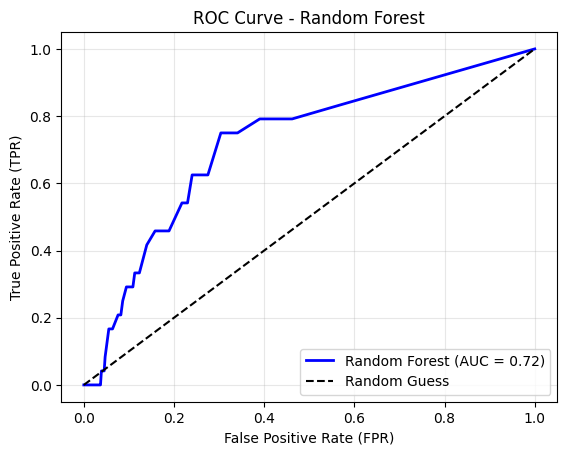

In [27]:
# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)  # Use probabilities for the positive class
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


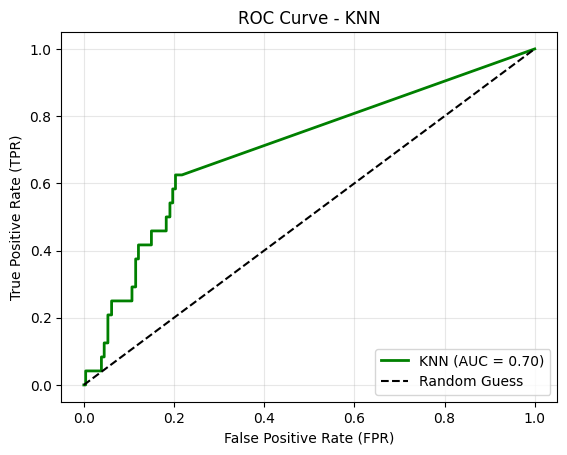

In [29]:
# Compute ROC curve and AUC for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn[:, 1])  # Use positive class probabilities
auc_knn = roc_auc_score(y_test, y_pred_proba_knn[:, 1])

# Plot the ROC curve
plt.figure()
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})", color="green", linewidth=2)
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - KNN")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

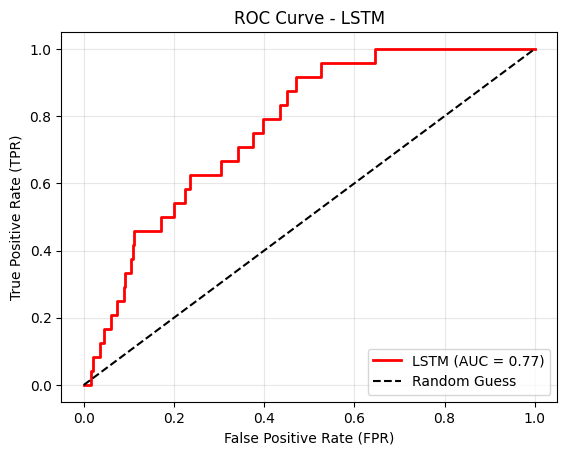

In [30]:
# Compute ROC curve and AUC for LSTM
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_proba_lstm)  # Use probabilities from LSTM
auc_lstm = roc_auc_score(y_test, y_pred_proba_lstm)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_lstm, tpr_lstm, label=f"LSTM (AUC = {auc_lstm:.2f})", color="red", linewidth=2)
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - LSTM")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
